In [5]:
# Import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
!pip install dataprep --quiet
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as sm
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn import metrics
import plotly.express as px
! pip install bar_chart_race
import bar_chart_race as bcr
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
! python3 -m pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Problem statement and justification for the proposed approach

For this project, we have exploited the dataset “Life Expectancy (WHO)”, which is available on Kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who) and  was extracted from the Global Health Observatory data repository. It contains 2938 rows and 22 features and includes data referring to 193 countries from 2000 to 2015. After an attentive dataset analysis, we identifyed the most important variables having an impact on life expectancy for both developed and developing countries and built three differet models. The first one is a classification model and is able to tell us if a given country can be classified as developed or developing based on all the other features. The second model, which is different for developed and developing countries, is a regression tree model and is able to predict life expectancy based on all the other features. The third model is able to forecast how life expectancy will change in the future based on past values. The first two models can be used to identify both status and life expectancy in a certain country for which we know the most important features. The third model focuses on the evolution of life expectancy over time based on previously measured values.

See the code in GitHUB at : https://github.com/CatGallo/Machine_Learning_Team_Project

## EDA

In [6]:
# Use the datafile "Life Expectancy data.csv" from https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

df = pd.read_csv('Life Expectancy Data.csv') # access and read the datafile
print('The shape of dataset df is', df.shape, '\n') # print the shape of df
print('The first five rows of dataset df are:\n', df.head()) # print df

# Creation of a first report to highlight important aspects
# create_report(df)

The shape of dataset df is (2938, 22) 

The first five rows of dataset df are:
        Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Pol

## Data preparation

In [7]:
# All the features are here saved
country = df['Country'] # name of the country
year = df['Year'] # year data refer to
status = df['Status'] # country status
life_expectancy = df['Life expectancy '] # life expectancy
adult_mortality = df['Adult Mortality'] # adult mortality
infant_deaths = df['infant deaths'] # number infant deaths
alcohol = df['Alcohol'] # average alcohol use
percentage_expenditure = df['percentage expenditure'] # percentage of expenditure
hepatitis_b = df['Hepatitis B'] # prevalence of hepatitis b
measles = df['Measles '] # prevalence of measles
bmi = df[' BMI '] # body mass index
under_five_deaths = df['under-five deaths '] # under five deaths
polio = df['Polio'] # prevalence of polio
total_expenditure = df['Total expenditure'] # total expenditure
diphtheria = df['Diphtheria '] # prevalence of diphtheria
hiv_aids = df[' HIV/AIDS'] # prevalence of HIV/AIDS
gdp = df['GDP'] # ground domestic product
population = df['Population'] # number of people
thinness_1_19 = df[' thinness  1-19 years'] # thinness 1-19
thinness_5_9 = df[' thinness 5-9 years'] # thinness 5-9
income_composition = df['Income composition of resources'] # income composition of resources
schooling = df['Schooling'] # prevalence of schooling

# Since there are some problems in some features names a new dataframe with the all the columns above is created and will be used throughout the notebook
df_bis = pd.DataFrame({'country': country,
                       'year': year,
                       'status': status,
                       'life_expectancy': life_expectancy,
                       'adult_mortality': adult_mortality,
                       'infant_deaths': infant_deaths,
                       'alcohol': alcohol,
                       'percentage_expenditure': percentage_expenditure,
                       'hepatitis_b': hepatitis_b,
                       'measles': measles,
                       'bmi': bmi,
                       'under_five_deaths': under_five_deaths,
                       'polio': polio,
                       'total_expenditure': total_expenditure,
                       'diphtheria': diphtheria,
                       'hiv_aids': hiv_aids,
                       'gdp': gdp,
                       'population': population,
                       'thinness_1_19': thinness_1_19,
                       'thinness_5_9': thinness_5_9,
                       'income_composition': income_composition,
                       'schooling': schooling})

## Feature engineering

In [8]:
# For each numeric column, NaN are substituted by the mean value of the column
for jj in range(3, len(df_bis.columns)):
    column_now = df_bis.columns[jj]
    mean_column = df_bis[column_now].mean()
    df_bis[column_now].fillna(value = mean_column, inplace=True)

# For same countries column 'status' is wrong. This was fixed here
df_bis.loc[df_bis['country'] == 'Canada', 'status'] = 'Developed'
df_bis.loc[df_bis['country'] == 'Finland', 'status'] = 'Developed'
df_bis.loc[df_bis['country'] == 'France', 'status'] = 'Developed'
df_bis.loc[df_bis['country'] == 'Greece', 'status'] = 'Developed'
df_bis.loc[df_bis['country'] == 'Israel', 'status'] = 'Developed'

# Some rows are removed. For same countries data are available for one year only
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Cook Islands'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Dominica'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Marshall Islands'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Monaco'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Nauru'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Niue'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Palau'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Saint Kitts and Nevis'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'San Marino'].index, axis = 0)
df_bis = df_bis.drop(df_bis[df_bis['country'] == 'Tuvalu'].index, axis = 0)

# replace the binary categorical feature status into a 0/1 feature
df_bis.status.replace(('Developing', 'Developed'), (0, 1), inplace = True)

print('The shape of dataset df_bis is', df_bis.shape, '\n') # print the shape of df_bis
print('The first five rows of dataset df_bis are:\n', df_bis.head(), '\n') # print df_bis

The shape of dataset df_bis is (2928, 22) 

The first five rows of dataset df_bis are:
        country  year  status  life_expectancy  adult_mortality  infant_deaths  \
0  Afghanistan  2015       0             65.0            263.0             62   
1  Afghanistan  2014       0             59.9            271.0             64   
2  Afghanistan  2013       0             59.9            268.0             66   
3  Afghanistan  2012       0             59.5            272.0             69   
4  Afghanistan  2011       0             59.2            275.0             71   

   alcohol  percentage_expenditure  hepatitis_b  measles  ...  polio  \
0     0.01               71.279624         65.0     1154  ...    6.0   
1     0.01               73.523582         62.0      492  ...   58.0   
2     0.01               73.219243         64.0      430  ...   62.0   
3     0.01               78.184215         67.0     2787  ...   67.0   
4     0.01                7.097109         68.0     3013  ...   6

## Feature selection

In [9]:
# Creation of a new report for df_bis
# create_report(df_bis)

In [10]:
# Based on the report above features thinness_1_19-thinness_5_9, income_composition-schooling, gdp_percentage_expenditure, and infant_deaths-under_five_deaths are highly correlated.
# Thus, feature thinness_5_9, schooling, percentage_expenditure, and under_five_deaths are removed from df_bis
df_bis = df_bis.drop(columns = ['thinness_5_9'])
df_bis = df_bis.drop(columns = ['schooling'])
df_bis = df_bis.drop(columns = ['percentage_expenditure'])
df_bis = df_bis.drop(columns = ['under_five_deaths'])

# Also adult mortality and life_expectancy are strongly related to each other. That is logical: if adult motality is known, life expectancy is easily predictable.
# For this reason, adult mortality is removed from df_bis
df_bis = df_bis.drop(columns = ['adult_mortality'])

In [11]:
# To better understand how df_bis is correlated to life_expectancy, the target variable for this problem, we use plot_correlation
plot_correlation(df_bis, 'life_expectancy')

Output hidden; open in https://colab.research.google.com to view.

As one imposes a threshold for significant correlation (no less than 0.5 and no more than -0.5), the most important variables will be income_composition, hiv_aids prevalence, and bmi. The relationship between life expectancy and each of this four variables is shown below.

In [12]:
plot(df_bis, 'life_expectancy', 'income_composition')

Output hidden; open in https://colab.research.google.com to view.

In [13]:
plot(df_bis, 'life_expectancy', 'hiv_aids')

Output hidden; open in https://colab.research.google.com to view.

In [14]:
plot(df_bis, 'life_expectancy', 'bmi')

Output hidden; open in https://colab.research.google.com to view.

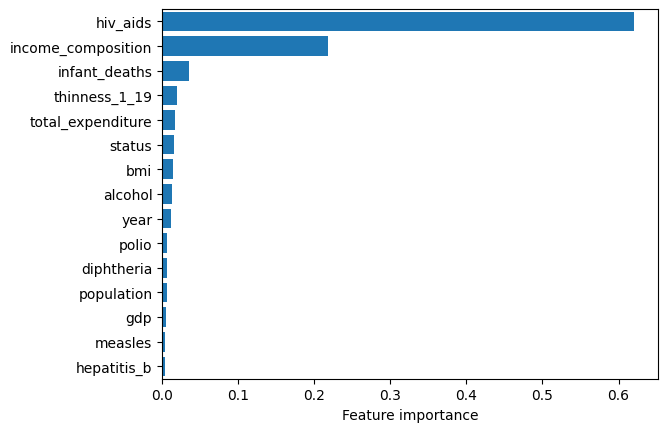

In [15]:
# Permutation importance plot to identify the most important variables

X = df_bis.drop(columns = ['country', 'life_expectancy'])
Y = df_bis['life_expectancy']

# Random Forest model to identify the most important features and permutation_importance.
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X, Y)
perm_import = permutation_importance(rfr, X, Y, n_repeats = 10, random_state = 42)

# The permutation importance plot follows the same lines of code reported in Permutation Importance with Multicollinear or Correlated Features (n.d.).
importance_idx = np.argsort(rfr.feature_importances_)
importance_indices = np.arange(0, len(rfr.feature_importances_)) + 0.5
fig, ax = plt.subplots()
ax.barh(importance_indices, rfr.feature_importances_[importance_idx], height = 0.8)
ax.set_yticks(importance_indices)
ax.set_yticklabels(X.columns.values[importance_idx])
ax.set_ylim((0, len(rfr.feature_importances_)))
ax.set_xlabel('Feature importance')
plt.show()

# References:
# Permutation Importance with Multicollinear or Correlated Features. (n.d.). Scikit Learn. Retrieved May 15, 2023, from https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#:~:text=The%20permutation%20importance%20plot%20shows,some%20feature%20must%20be%20important

The permutation plot above is in accordance to the the most important variables identified through the correlation plot. In fact, thinness1_19 and bmi are correlated.

The dataset df_bis is unbalanced in terms of status. Thus, we split df_bis into two different dataframes to compare life expectancy for developed (status = 1) and developing countries (status = 0).

In [16]:
df_bis_0 = df_bis[df_bis["status"] == 0] # dataframe for developing countries
df_bis_1 = df_bis[df_bis["status"] == 1] # dataframe for developed countries
# plot_diff([df_bis_0, df_bis_1]) # comparing the two dataframes

Based on the graph above, it is clear that the distributions of the of the different features can change a lot for developing and developed countries. Thus, we analyzed the permutation importance plot in both developing and developed countries. Results are shown in the following.

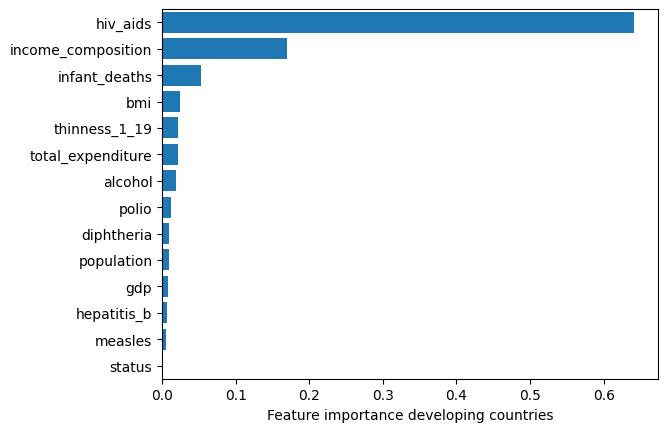

In [17]:
# Permutation importance plot to identify the most important variables in developing countries

X = df_bis_0.drop(columns = ['country', 'life_expectancy', 'year'])
Y = df_bis_0['life_expectancy']

# Random Forest model to identify the most important features and permutation_importance.
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X, Y)
perm_import = permutation_importance(rfr, X, Y, n_repeats = 10, random_state = 42)

# The permutation importance plot follows the same lines of code reported in Permutation Importance with Multicollinear or Correlated Features (n.d.).
importance_idx = np.argsort(rfr.feature_importances_)
importance_indices = np.arange(0, len(rfr.feature_importances_)) + 0.5
fig, ax = plt.subplots()
ax.barh(importance_indices, rfr.feature_importances_[importance_idx], height = 0.8)
ax.set_yticks(importance_indices)
ax.set_yticklabels(X.columns.values[importance_idx])
ax.set_ylim((0, len(rfr.feature_importances_)))
ax.set_xlabel('Feature importance developing countries')
plt.show()

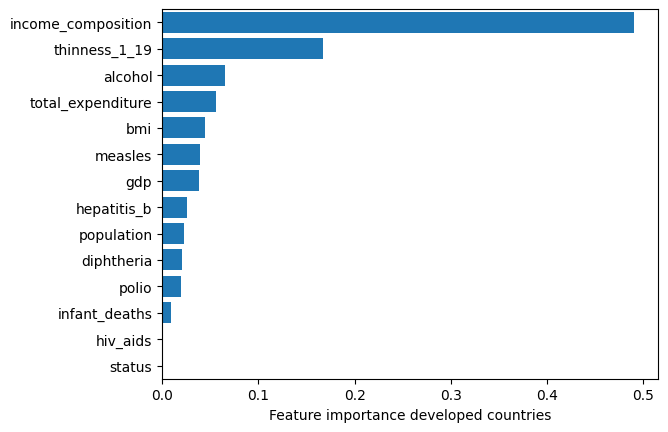

In [18]:
# Permutation importance plot to identify the most important variables in developed countries

X = df_bis_1.drop(columns = ['country', 'life_expectancy', 'year'])
Y = df_bis_1['life_expectancy']

# Random Forest model to identify the most important features and permutation_importance.
rfr = RandomForestRegressor(n_estimators = 100, random_state = 42).fit(X, Y)
perm_import = permutation_importance(rfr, X, Y, n_repeats = 10, random_state = 42)

# The permutation importance plot follows the same lines of code reported in Permutation Importance with Multicollinear or Correlated Features (n.d.).
importance_idx = np.argsort(rfr.feature_importances_)
importance_indices = np.arange(0, len(rfr.feature_importances_)) + 0.5
fig, ax = plt.subplots()
ax.barh(importance_indices, rfr.feature_importances_[importance_idx], height = 0.8)
ax.set_yticks(importance_indices)
ax.set_yticklabels(X.columns.values[importance_idx])
ax.set_ylim((0, len(rfr.feature_importances_)))
ax.set_xlabel('Feature importance developed countries')
plt.show()

The two graphs above show an interesting result: feature hiv_aids is the most important feature while predicting life_expectancy in developing contries, while it is not relevant in developed countries. Other features, instead, like income_composition and total_expenditure are relevant for both developed and developing countries.

In [19]:
# Function to build a dataset including as many columns as the number of developing/developed countries and as many rows as the number of years data are available for each country

def le_evolution(data):
    countries = data.country.unique()
    country_time = pd.DataFrame({'year': data[data['country'] == countries[0]]['year'].iloc[::-1]})
    for jj in range(0, len(countries)):
        add_df = pd.DataFrame({'year': data[data['country'] == countries[jj]]['year'],
                               countries[jj]: data[data['country'] == countries[jj]]['life_expectancy']})
        country_time = pd.merge(country_time, add_df, on = 'year', how = 'outer')

    # The year column is converted into a date, which is then set as index
    country_time['year'] = country_time['year'].astype('str') + "-01-01" # modify the column 'year', chosen date format y-m-d
    country_time['date'] = pd.to_datetime(country_time['year']) # add column 'date'
    country_time = country_time.drop(columns = ['year']) # remove column 'year'
    country_time = country_time.set_index('date') # set date as index
    return country_time

In [20]:
# Bar chart race to show the evolution of life expectancy in top five developing countries for life expectancy from 2000 to 2015
le_evolution0 = le_evolution(df_bis_0)
bcr.bar_chart_race(df = le_evolution0,
                   n_bars = 5,
                   steps_per_period = 20,
                   period_length = 2000,
                   filter_column_colors = True,
                   title = 'Top five developing countries for life expectancy from 2000 to 2015'
                   )

In [21]:
# Bar chart race to show the evolution of life expectancy in top five developed countries for life expectancy from 2000 to 2015
le_evolution1 = le_evolution(df_bis_1)
bcr.bar_chart_race(df = le_evolution1,
                   n_bars = 5,
                   steps_per_period = 20,
                   period_length = 2000,
                   filter_column_colors = True,
                   title = 'Top five developed countries for life expectancy from 2000 to 2015'
                   )

## Modelling and Evaluation

Sections Modelling and Evaluation are here reported together. For the sake of simplicity, the performance of each model is evaluated before describing the next model.

In order to evaluate the performance of both the Naive Bayes Classifier and Classification Tree model, we used three parameters: accuracy, recall, and f1-score.  

# Naive Bayes Classifier: predicting the status of a set of countries as all the other variables are known

Test accuracy - Naive Bayes Classifier: 0.85
Recall - Naive Bayes Classifier: 0.85
F1 Score - Naive Bayes Classifier: 0.83


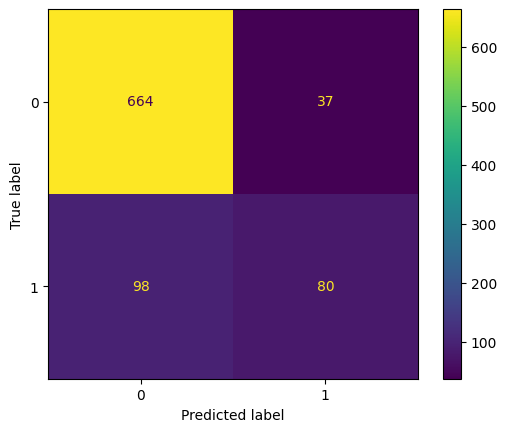

In [22]:
# Response and predictor variables
X2 = df_bis.drop(columns = ['status'])
X2 = X2.set_index('country')
Y2 = df_bis['status']

# Train and target response/predictor variables
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.3, random_state = 1) # 70% training and 30% test

# Naive Bayes Classifier
nbc = GaussianNB(var_smoothing = 1e-8) # create the naive bayes classifer object
nbc = nbc.fit(X2_train, Y2_train) # fit the model

# Evaluating the NB classifier
Y2_pred_nbc = nbc.predict(X2_test) # predict the response for test dataset

# Compute accuracy, recall, and f1-score
print("Test accuracy - Naive Bayes Classifier:", round(metrics.accuracy_score(Y2_test, Y2_pred_nbc), 2))
print("Recall - Naive Bayes Classifier:", round(metrics.recall_score(Y2_test, Y2_pred_nbc, average = "weighted"), 2))
print("F1 Score - Naive Bayes Classifier:", round(metrics.f1_score(Y2_test, Y2_pred_nbc,  average = "weighted"), 2))

# Create the confusion matrix
cm_nbc = metrics.confusion_matrix(Y2_test, Y2_pred_nbc)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm_nbc).plot()
plt.show()

# Classification Tree Model: predicting the status of a set of countries as all the other variables are known

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4}
Test accuracy - Classification Tree: 0.97
Recall - Classification Tree: 0.97
F1 Score - Classification Tree: 0.97


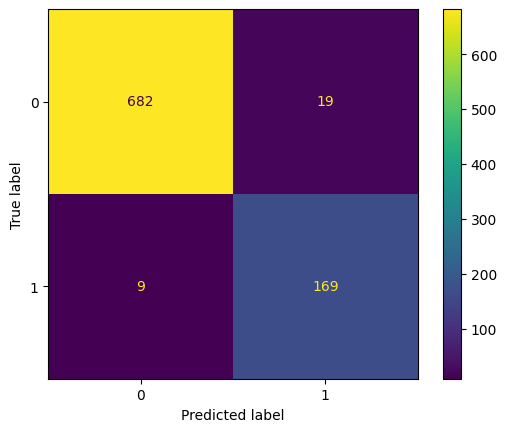

In [23]:
# Use grid search to find the best parameters and fit the grid search object to (X2_train, Y2_train)
parameters_to_test = {'max_depth': [2,4,6,8,10,12], 'min_samples_split': [2,3,4], 'min_samples_leaf': [1,2]}
ctm = tree.DecisionTreeClassifier()
gscv = GridSearchCV(estimator = ctm, param_grid = parameters_to_test)
gscv.fit(X2_train, Y2_train)

# Print the best parameters
print('Best parameters:', gscv.best_params_)

# Use the best parameters in the final model
best_ctm = gscv.best_estimator_

# Evaluating the classification tree model
Y2_pred_ctm = best_ctm.predict(X2_test) # predict the response for test dataset

# Compute accuracy, recall, and f1-score
print("Test accuracy - Classification Tree:", round(metrics.accuracy_score(Y2_test, Y2_pred_ctm), 2))
print("Recall - Classification Tree:", round(metrics.recall_score(Y2_test, Y2_pred_ctm, average = "weighted"), 2))
print("F1 Score - Classification Tree:", round(metrics.f1_score(Y2_test, Y2_pred_ctm,  average = "weighted"), 2))

# Create the confusion matrix
cm_ctm = metrics.confusion_matrix(Y2_test, Y2_pred_ctm)
metrics.ConfusionMatrixDisplay(confusion_matrix = cm_ctm).plot()
plt.show()

The classification tree model exhibits a better performance compared to the Naive Bayes Classifier. Test accuracy and recall increase of around 14% and F1-score increase of about 17% with the classification tree model. Thus, it is recommended to adopt the classification tree model to predict the status of a set of countries as all the other variables are known in this problem.

# Regression Decision Tree Model: predicting life expectancy for developed and developing countries

As already observed in section 'Feature Selection', the distributions of the different features change a lot for developing and developed countries. For this reason, it has been decided to create two different regression models, one for developing countries and the other for developed countries. In this way, a better performance is achieved.

In order to evaluate the performance of the regression tree models, we exploit two different parameters: the mean squared error and the R2 score. The mean squared error is the average squared difference between expected (true) and predicted values. The R2 score is  the coefficient of determination and it tells us how well true values can be predicted by the model.

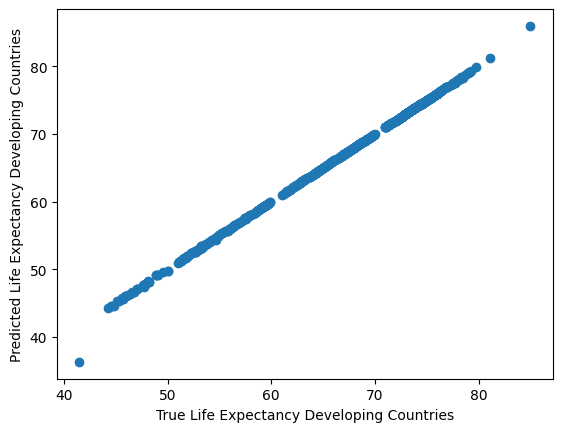

Mean squared error developing Countries: 0.04
R2 score developing Countries: 1.0


In [24]:
# Response and predictor variables in developing countries
X0 = df_bis_0
X0 = X0.set_index('country')
Y0 = df_bis_0['life_expectancy']

# Train and target response/predictor variables in developing countries
X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size = 0.3, random_state = 1) # 70% training and 30% test

# Decision tree regressor for developing countries
dtr0 = DecisionTreeRegressor(random_state = 44) # create the regression tree model object
dtr0.fit(X0_train, Y0_train) # fit the model
pred_le0 = dtr0.predict(X0_test) # predicted life expectancy for developing countries
expe_le0 = Y0_test # expected life expectancy for developing countries

# Model performance for developing countries

# Scatter plot, expected and predicted life expectancy
plt.scatter(expe_le0, pred_le0)
plt.xlabel('True Life Expectancy Developing Countries')
plt.ylabel('Predicted Life Expectancy Developing Countries')
plt.show()

# Mean squared error and R2 score
print("Mean squared error developing Countries:", round(sm.mean_squared_error(expe_le0, pred_le0), 2))
print("R2 score developing Countries:", round(sm.r2_score(expe_le0, pred_le0), 2))

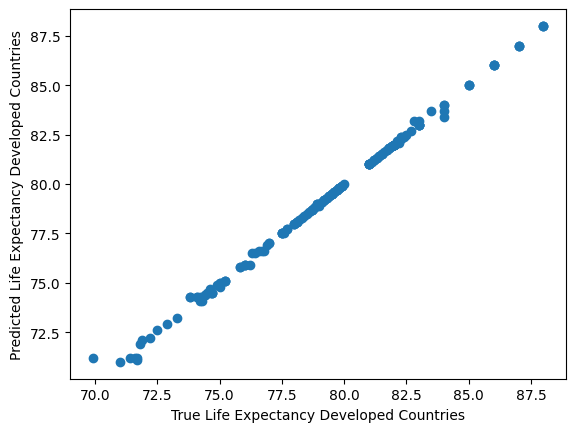

Mean squared error developed countries: 0.02
R2 score developed countries: 1.0


In [25]:
# Response and predictor variables in developed countries
X1 = df_bis_1
X1 = X1.set_index('country')
Y1 = df_bis_1['life_expectancy']

# Train and target response/predictor variables in developed countries
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.3, random_state = 1) # 70% training and 30% test

# Decision tree regressor for developed countries
dtr1 = DecisionTreeRegressor(random_state = 44) # create the regression tree model object
dtr1.fit(X1_train, Y1_train) # fit the model
pred_le1 = dtr1.predict(X1_test) # predicted life expectancy for developed countries
expe_le1 = Y1_test # expected life expectancy for developed countries

# Model performance for developed countries

# Scatter plot, expected and predicted life expectancy
plt.scatter(expe_le1, pred_le1)
plt.xlabel('True Life Expectancy Developed Countries')
plt.ylabel('Predicted Life Expectancy Developed Countries')
plt.show()

# Mean squared error and R2 score
print("Mean squared error developed countries:", round(sm.mean_squared_error(expe_le1, pred_le1), 2))
print("R2 score developed countries:", round(sm.r2_score(expe_le1, pred_le1), 2))

Both the regression models work very well, as one can observe from the scatter plots between true and predicted life expectancy, the mean squared errors and the R2 scores.

# Time Series Forecasting: predicting life expectancy for a given country

In order to evaluate the performance of time series forecasting model, we used the mean squared error.

First, we used this model on a country chosen by the user. Then we calculated the mean squared error for all the countries in the dataset.

In [26]:
# Function to forecast life expectancy based on past values

def forecast_le(train_data, test_data):

    # Use an ARIMAmodel by following the same procedure described by Sadrach (n.d.)
    ARIMAmodel = ARIMA(train_data, order = (2, 2, 2)) # define the model
    ARIMAmodel = ARIMAmodel.fit() # fit the model
    df_ts_pred = ARIMAmodel.get_forecast(len(test_data.index)) # get_forecast
    df_ts_pred = df_ts_pred.conf_int(alpha = 0.05) # impose the confidence interval such that both upper and lower bounds around the prediction are available
    df_ts_pred['predictions'] = ARIMAmodel.predict(start = df_ts_pred.index[0], end = df_ts_pred.index[-1]) # predictions
    df_ts_pred.index = test_data.index # define the indexes
    predictions = df_ts_pred['predictions'] # save the predictions

    # Calculate the root-mean-squared error
    df_ts_rmse = np.sqrt(mean_squared_error(test_data, predictions))
    return predictions, df_ts_rmse

# Reference:
# Sadrach, P. (n.d.). A Guide to Time Series Forecasting in Python. Built In. https://builtin.com/data-science/time-series-forecasting-python

Enter the country one wants to predict life expectancy: Italy
The root-mean-squared error for life expectancy in Italy  is 0.24 



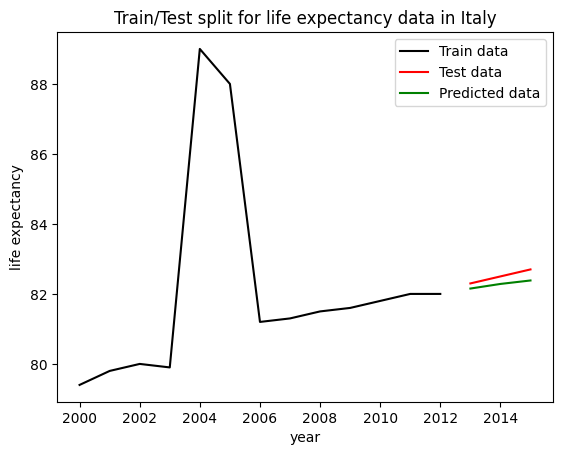

In [27]:
COUNTRY = input('Enter the country one wants to predict life expectancy: ') # choose the country one wants to predict life expectancy in the future
STATUS = df_bis[df_bis['country'] == COUNTRY]['status'].unique()[0] # status of the chosen country

# Choose the dataset to use depending on STATUS: le_evolution0 if STATUS == 0 or le_evolution1 if STATUS == 1
if STATUS == 0:
    df_ts = le_evolution0[COUNTRY]
else:
    df_ts = le_evolution1[COUNTRY]

# Define the data for training and testing
df_ts_train = df_ts[df_ts.index <= pd.to_datetime("2012-01-01", format = '%Y-%m-%d')] # data before 2012-01-01 are used for training
df_ts_test = df_ts[df_ts.index >= pd.to_datetime("2013-01-01", format = '%Y-%m-%d')] # data after 2012-01-01 are used for testing
# Call the forecast_le() function
predictions_COUNTRY, rmse_COUNTRY = forecast_le(df_ts_train, df_ts_test)
# Show model results
print('The root-mean-squared error for life expectancy in '+COUNTRY, ' is', round(rmse_COUNTRY, 2), '\n')

plt.plot(df_ts_train, color = 'black', label = 'Train data')
plt.plot(df_ts_test, color = 'red', label = 'Test data')
plt.plot(predictions_COUNTRY, color = 'green', label = 'Predicted data')
plt.legend()
plt.ylabel('life expectancy')
plt.xlabel('year')
plt.title('Train/Test split for life expectancy data in '+COUNTRY)
plt.show()

In [28]:
# Evaluate the root-mean-squared error for all developing and developed countries by using the function forecast_le

# Developing countries
list_countries0 = df_bis_0.country.unique() # list of developing countries
erms_countries0 = [] # list to save the erms for each developing country
for jj in range(len(list_countries0)):
    COUNTRY = list_countries0[jj]
    le_evolution0_train = le_evolution0[COUNTRY][le_evolution0[COUNTRY].index <= pd.to_datetime("2012-01-01", format = '%Y-%m-%d')] # data before 2012-01-01 are used for training
    le_evolution0_test = le_evolution0[COUNTRY][le_evolution0[COUNTRY].index >= pd.to_datetime("2013-01-01", format = '%Y-%m-%d')] # data after 2012-01-01 are used for testing
    predictions_COUNTRY, erms_COUNTRY = forecast_le(le_evolution0_train, le_evolution0_test) # call function forecast_le
    erms_countries0.append(erms_COUNTRY) # the list of erms values is progressively updated country by country
predictions_countries0 = pd.DataFrame({'country': list_countries0, 'erms': erms_countries0}) # dataframe showing the erms for all developing countries
predictions_countries0 = predictions_countries0.set_index('country') # set country as index

# Developed countries
list_countries1 = df_bis_1.country.unique() # list of developed countries
erms_countries1 = [] # list to save the erms for each developed country
for jj in range(len(list_countries1)):
    COUNTRY = list_countries1[jj]
    le_evolution1_train = le_evolution1[COUNTRY][le_evolution1[COUNTRY].index <= pd.to_datetime("2012-01-01", format = '%Y-%m-%d')] # data before 2012-01-01 are used for training
    le_evolution1_test = le_evolution1[COUNTRY][le_evolution1[COUNTRY].index >= pd.to_datetime("2013-01-01", format = '%Y-%m-%d')] # data after 2012-01-01 are used for testing
    predictions_COUNTRY, erms_COUNTRY = forecast_le(le_evolution1_train, le_evolution1_test) # call function forecast_le
    erms_countries1.append(erms_COUNTRY) # the list of erms values is progressively updated country by country
predictions_countries1 = pd.DataFrame({'country': list_countries1, 'erms': erms_countries1}) # dataframe showing the erms for all developed countries
predictions_countries1 = predictions_countries1.set_index('country') # set country as index

To understand how much the erms values we got are small, we normalized them: they were divided by the difference between the maximum and minimum erms values for developing or developed countries.

In [29]:
max_predictions0 = predictions_countries0['erms'].max() # maximum erms for developing countries
min_predictions0 = predictions_countries0['erms'].min() # minimum erms for developing countries
predictions_countries0['norm erms'] = predictions_countries0['erms'] / (max_predictions0 - min_predictions0) # add the normalized erms for all developing countries
print("Sample size, mean, standard deviation, and five number summary of the mean_squared_error for life expectancy in developing countries are reported below")
round(predictions_countries0['norm erms'].describe(), 2)

Sample size, mean, standard deviation, and five number summary of the mean_squared_error for life expectancy in developing countries are reported below


count    146.00
mean       0.03
std        0.10
min        0.00
25%        0.00
50%        0.01
75%        0.02
max        1.00
Name: norm erms, dtype: float64

In [30]:
max_predictions1 = predictions_countries1['erms'].max() # maximum erms for developed countries
min_predictions1 = predictions_countries1['erms'].min() # minimum erms for developed countries
predictions_countries1['norm erms'] = predictions_countries1['erms'] / (max_predictions1 - min_predictions1) # add the normalized erms for all developed countries
print("Sample size, mean, standard deviation, and five number summary of the mean_squared_error for life expectancy in developed countries are reported below")
round(predictions_countries1['norm erms'].describe(), 2)

Sample size, mean, standard deviation, and five number summary of the mean_squared_error for life expectancy in developed countries are reported below


count    37.00
mean      0.08
std       0.17
min       0.00
25%       0.00
50%       0.02
75%       0.11
max       1.00
Name: norm erms, dtype: float64

Also the time series forecasting models works pretty well, although the mean error is smaller for devloping (3%) than for developed countries (8%). For some countries it leads to completely wrong solutions, in fact, the maximum normalized error is 1. Such high errors are rare and could be improved with more data. For each country, we can just rely on 15 measurements, two-tree of which are necessary for testing.  

## Discussion and conclusions

1. Dataset was modified for ease of work with the names of the features.
2. Countries with very few data were deleted from the dataset to avoid confusion on the model.
3. With the Random forest model, the system was able to detect the most important/impactful features related to life expectancy.
4. Due to the imbalance and inequalities between the developed and developing countries, the dataset was split in two. For developing countries HIV and Income where the most impactful to life expectancy. For developed countries, Income, thinness and alcohol consumption.
5. Two models were built for status classification of countries, Naive Bayes performed at .83 F1 score and the Classification tree achieved .97 after hyperparameters grid search and tuning.
6. Two predictors were built for life expectancy, one for each type of country development status. This by employing regression in decision trees.
7. For specific country life expectancy prediction, a Time-series ARIMA model was implemented, user prompts the name of the country to see a prediction of three years on life expectancy.
8. For deployment and future upgrades, the predictor shall be trained with more data of previous years for each country and gather missing data.
9. Granularity can improve the models by accounting for montly datapoints instead of yearly.
10. Future iterations of the system could implement a user prompt to change the values of a given feature for a specific country and evaluate how that affects life expectancy prediction.
